# @yush Real State -Price Predictor

In [1]:
print("hello")

hello


In [2]:
import pandas as pd

In [3]:
housing=pd.read_csv("dataa.csv")

In [4]:
print("hello")

hello


In [5]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
#import matplotlib as plt
#housing.hist(bins=50,figsize=(20,15)) #For ploting the histogram

In [9]:
#plt.show


# #Train Test Spliting

In [10]:
#for learning purpose
#import numpy as np
#def split_train_test(data,test_ratio):
    #np.random.seed(42)
    #shuffled=np.random.permutation(len(data))
    #test_set_size=int(len(data)*test_ratio)
    #test_indices=shuffled[:test_set_size]
    #train_indices=shuffled[test_set_size:]
    #return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
#train_set,test_set =split_train_test(housing,0.2)

In [12]:
#print(f"Rows in Train Test:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set ,test_set =train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in Train Test:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in Train Test:404
Rows in test set:101



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    start_train_set=housing.loc[train_index]
    start_test_set=housing.loc[test_index]
    
    

In [15]:
start_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [16]:
start_test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
176,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29,24.6
284,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
223,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
87,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
261,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8


In [17]:
start_test_set["TAXRM"]=start_test_set['TAX']/start_test_set['RM']

In [18]:
start_test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
176,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29,24.6,46.872526
284,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0,46.490005
223,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8,37.140092
87,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6,38.532896
261,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,31.436056


In [19]:
start_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
housing=start_train_set.copy()

In [21]:
#the above line is for because we want to copy whole our training data into housing

# Looking for corelation

In [22]:
a=housing.corr()
a['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660761
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EEC08E188>,
      dtype=object)

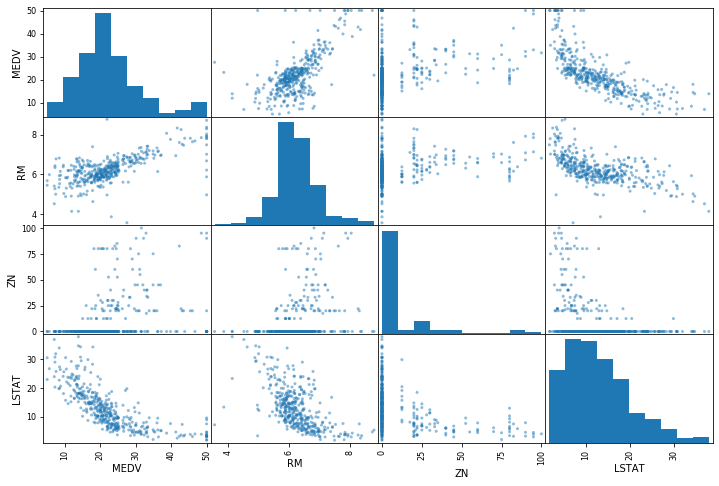

In [23]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [24]:
##Now we will find the strong relation here the best relation is MEDV vs LSTAT(-ve co-relation) here there is also good co-relation between MEDV and RM(+ve corelation)

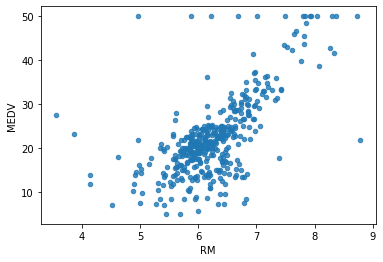

In [25]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [26]:
#here we investigate to our data collector that why it stops at 50 means house which is has 9 rooms and which have 5 rooms have eual price thats a mistake 

In [27]:
housing=start_train_set.drop("MEDV",axis=1)   #comment this line than many lines will run
housing_labels=start_train_set["MEDV"].copy()

# Try out Atribute Combination

In [28]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [29]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,47.180667


In [30]:
start_test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
176,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29,24.6,46.872526
284,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0,46.490005
223,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8,37.140092
87,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6,38.532896
261,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,31.436056


In [31]:

#a=housing.corr()
#a['MEDV'].sort_values(ascending=False)

In [32]:
#as u can see there is a strong co-relation between TAXRM and MEDV it can be best seen by plotting a scatter plot

In [33]:
#housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [34]:
#here u can say that there is the best negatice co-relation best that's mahine learning for u bro

# Removing missing atributes -only for educational purpose

In [35]:
#to take care of missing atributes,you can have onlu three options:
#1-get rid of missing points
#2-get rid of whole atributes
#3-Set the value to some value example 0,medean,mean

In [36]:
#How to use option 1
#example a=housing.dropna(subset=["RM"])
#a.shape
##Orignal housing wil not be changed 

In [37]:
#How to use option 2
#housing.drop("RM",axis=1).shape
##But removing RM is not a goood aproach because RM is very important feature orignal housing will not be change

In [38]:
##How to use option 3
#median=housing["RM"].median()
#housing["Rm"]==fillna(median)


In [39]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251631,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292,67.563245
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688800,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418,31.412096
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500,44.630108
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000,54.429362
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500,98.321162
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,187.026116


# REMOVING The MISSING VALUES BY USING SKLEARN

In [40]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [41]:
X=imputer.transform(housing)

In [42]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [43]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251631,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292,67.563245
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688800,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418,31.412096
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500,44.630108
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000,54.429362
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500,98.321162
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,187.026116


# CREATING A PIPELINE

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [45]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [46]:
housing_num_tr

array([[-0.44241248,  3.18716752, -1.12581552, ...,  0.43852974,
        -0.49833679, -0.44481755],
       [-0.44320015,  1.36098896, -1.47680838, ...,  0.38242047,
        -0.96561983, -0.61470928],
       [ 1.3766227 , -0.46518961,  0.99776471, ..., -0.04255723,
         1.67953595,  1.84878731],
       ...,
       [-0.43839281, -0.46518961, -1.23595972, ...,  0.4566363 ,
        -0.92389813, -0.96727207],
       [ 0.11992217, -0.46518961,  0.99776471, ..., -3.61123302,
         0.85900919,  1.39872708],
       [-0.44118424, -0.46518961,  0.37948858, ...,  0.41347532,
         0.09411135, -0.6594242 ]])

# Selecting a desired model for @yush real state

In [47]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)


C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [48]:
some_data=housing.iloc[:5]
#for taking only 4 datasets

In [49]:
some_labels=housing_labels.iloc[:5]

In [50]:
#now we will see our prediction


In [51]:
prepared_data=my_pipeline.transform(some_data)

In [52]:
a=model.predict(prepared_data)
print(a)

[20.74 26.68 11.67 20.8  22.39]


In [53]:
some_labels

254    20.9
348    26.6
476    12.0
321    20.4
326    22.2
Name: MEDV, dtype: float64

# Evaluating the model

In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_prediction=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

1.565812271412806


In [55]:
##here our root mean square error is 4 which is not a bad 

In [56]:
##waooo when u use decisson tree as a model rmse is 0 that's good not that was not good becaurse here our model is underfit

# USING CROSS VALIDATION TECHNIQUES

In [57]:
#dividing data into groupssss exmaple out of 500 we will frst train on our 10data
#example 1 2 3 4 5 6 7 8 9 10
#pehle 1 ko rakhke train karenge 
#fir 1 ko htadenge phir 2-10 tak train karenge
#fir 2 ko bhi hata denge 3-10 tak train karenge

In [58]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
print(rmse_scores)

[3.43266518 2.79711742 4.76288496 3.06768921 2.66991667 2.42703832
 3.2461173  2.98927583 2.04063225 5.1934632 ]


In [59]:
#now we wan't mean 

In [60]:
print("hello")

hello


In [61]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean",scores.mean())
    print("Standard Diviation",scores.std())
    
    

In [62]:
print_scores(rmse_scores)

Scores: [3.43266518 2.79711742 4.76288496 3.06768921 2.66991667 2.42703832
 3.2461173  2.98927583 2.04063225 5.1934632 ]
Mean 3.2626800336024955
Standard Diviation 0.9423531092313323


# Saving The model

In [63]:
from joblib import dump,load
dump(model,'RealState.joblib')

['RealState.joblib']

# Testing the model

In [64]:

X_test=start_test_set.drop("MEDV",axis=1)
Y_test=start_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_prediction=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
#print(final_prediction,list(Y_test))

In [65]:
final_rmse

3.5364100496978517

In [66]:
prepared_data


array([[-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
        -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
        -0.99428207,  0.43852974, -0.49833679, -0.44481755],
       [-0.44320015,  1.36098896, -1.47680838, -0.27288841, -1.10240378,
         0.99916015, -1.1989661 ,  2.36117906, -0.99534776, -0.45485099,
         0.56613801,  0.38242047, -0.96561983, -0.61470928],
       [ 1.3766227 , -0.46518961,  0.99776471, -0.27288841,  0.48750758,
        -1.37747786,  1.01247149, -0.79019848,  1.6351333 ,  1.51504551,
         0.80256529, -0.04255723,  1.67953595,  1.84878731],
       [-0.40410185, -0.46518961, -0.5765631 , -0.27288841, -0.55238039,
        -0.30617375, -0.65667089,  0.44390346, -0.5378728 , -0.74051574,
         0.51885255,  0.4566363 , -0.71389891, -0.63922573],
       [-0.41746554, -0.46518961, -0.5765631 , -0.27288841, -0.55238039,
        -0.2451225 , -0.87499753,  0.77112603, -0.5378728 , -0.74051574,
         0.51885255,  0.45

In [67]:
from joblib import dump,load
import numpy as np 
model=load('RealState.joblib')

In [68]:
FEATURES=np.array([[-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
        -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
        -0.99428207,  0.43852974, -0.49833679, -0.44481755]])
model.predict(FEATURES)

array([20.74])

In [69]:
print("hello")

hello
